In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'grey'
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['axes.grid'] = True

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/NY_MotoVecCol

/content/drive/MyDrive/Colab Notebooks/NY_MotoVecCol


In [4]:
frame = pd.read_csv('ny_mvc_data.csv', header=0, sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
frame.dtypes

borough                           object
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
contributing_factor_vehicle_3     object
contributing_factor_vehicle_4     object
contributing_factor_vehicle_5     object
cross_street_name                 object
timestamp                         object
latitude                         float64
longitude                        float64
location                          object
number_of_cyclist_injured          int64
number_of_cyclist_killed           int64
number_of_motorist_injured         int64
number_of_motorist_killed          int64
number_of_pedestrians_injured      int64
number_of_pedestrians_killed       int64
number_of_persons_injured          int64
number_of_persons_killed           int64
off_street_name                   object
on_street_name                    object
unique_key                         int64
vehicle_type_code1                object
vehicle_type_code2                object
vehicle_type_cod

In [6]:
#frame.head()

In [7]:
#total injured sum of columns
frame['sum_injured'] = (frame.number_of_cyclist_injured + frame.number_of_motorist_injured + frame.number_of_pedestrians_injured)
#total killed sum of columns
frame['sum_killed'] = (frame.number_of_cyclist_killed + frame.number_of_motorist_killed + frame.number_of_pedestrians_killed)

In [8]:
#date = pd.to_datetime(frame['timestamp'])
frame['date_date'] = pd.to_datetime(frame['timestamp'])

#date.head()


In [9]:
#frame['date_date'] = date

In [10]:
frame['year'] = frame['date_date'].dt.year
frame['month'] = frame['date_date'].dt.month
frame['day'] = frame['date_date'].dt.day

In [11]:
frame['time'] = frame['date_date'].dt.time

In [12]:
frame['date'] = frame['date_date'].dt.date

In [13]:
frame[['timestamp','year','month','day', 'time', 'date']].head()

,timestamp,year,month,day,time,date
0,2018-01-17 10:35:00 UTC,2018,1,17,10:35:00,2018-01-17
1,2015-05-08 17:30:00 UTC,2015,5,8,17:30:00,2015-05-08
2,2017-11-22 07:15:00 UTC,2017,11,22,07:15:00,2017-11-22
3,2017-12-05 07:30:00 UTC,2017,12,5,07:30:00,2017-12-05
4,2017-11-03 09:22:00 UTC,2017,11,3,09:22:00,2017-11-03


In [14]:
factor = ['Accelerator Defective',
 'Aggressive Driving/Road Rage',
 'Alcohol Involvement',
 'Animals Action',
 'Backing Unsafely',
 'Brakes Defective',
 'Cell Phone (hand-held)',
 'Cell Phone (hands-free)',
 'Driver Inattention/Distraction',
 'Driver Inexperience',
 'Driverless/Runaway Vehicle',
 'Drugs (Illegal)',
 'Failure to Keep Right',
 'Failure to Yield Right-of-Way',
 'Fatigued/Drowsy',
 'Fell Asleep',
 'Following Too Closely',
 'Glare',
 'Headlights Defective',
 'Illness',
 'Lane Marking Improper/Inadequate',
 'Lost Consciousness',
 'Obstruction/Debris',
 'Other Electronic Device',
 'Other Lighting Defects',
 'Other Vehicular',
 'Outside Car Distraction',
 'Oversized Vehicle',
 'Passenger Distraction',
 'Passing or Lane Usage Improper',
 'Pavement Defective',
 'Pavement Slippery',
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
 'Physical Disability',
 'Prescription Medication',
 'Reaction to Other Uninvolved Vehicle',
 'Shoulders Defective/Improper',
 'Steering Failure',
 'Tire Failure/Inadequate',
 'Tow Hitch Defective',
 'Traffic Control Device Improper/Non-Working',
 'Traffic Control Disregarded',
 'Turning Improperly',
 'Unsafe Lane Changing',
 'Unsafe Speed',
 'Unspecified',
 'View Obstructed/Limited',
 'Windshield Inadequate']

group_factor = ['Vehicle',
'Driver',
'Driver',
'Environment',
'Driver',
'Vehicle',
'Driver',
'Driver',
'Driver',
'Driver',
'Vehicle',
'Driver',
'Driver',
'Driver',
'Driver-Health',
'Driver-Health',
'Driver',
'Environment',
'Vehicle',
'Driver-Health',
'Environment',
'Driver-Health',
'Environment',
'Driver',
'Environment',
'Driver',
'Environment',
'Driver',
'Passenger',
'Driver',
'Environment',
'Environment',
'Pedestrian',
'Driver-Health',
'Driver-Health',
'Driver',
'Environment',
'Vehicle',
'Vehicle',
'Vehicle',
'Environment',
'Driver',
'Driver',
'Driver',
'Driver',
'Unknown',
'Environment',
'Vehicle']

In [15]:
map_factor =  pd.DataFrame({'factor':factor, 'group_factor':group_factor}).set_index('factor')

In [16]:
#map_factor
map_factor_dict = map_factor['group_factor'].to_dict()

In [17]:
frame['group_factor_1'] = frame['contributing_factor_vehicle_1'].apply(lambda x: map_factor_dict.get(x, None))
frame['group_factor_2'] = frame['contributing_factor_vehicle_2'].apply(lambda x: map_factor_dict.get(x, None))
frame['group_factor_3'] = frame['contributing_factor_vehicle_3'].apply(lambda x: map_factor_dict.get(x, None))
frame['group_factor_4'] = frame['contributing_factor_vehicle_4'].apply(lambda x: map_factor_dict.get(x, None))
frame['group_factor_5'] = frame['contributing_factor_vehicle_5'].apply(lambda x: map_factor_dict.get(x, None))

In [18]:
#frame.head()
frame.to_csv('ny_mvc_data_updated.csv', sep=',', header=True, index=False)

In [19]:
frame.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,sum_injured,sum_killed,date_date,year,month,day,time,date,group_factor_1,group_factor_2,group_factor_3,group_factor_4,group_factor_5
0,QUEENS,Outside Car Distraction,Unspecified,NaN,NaN,NaN,GREENWAY SOUTH,2018-01-17 10:35:00 UTC,40.710400,-73.839740,"(40.7104, -73.83974)",0,0,0,0,0,0,0,0,NaN,UNION TURNPIKE,3830694,SPORT UTILITY / STATION WAGON,AM,NaN,NaN,NaN,11375.0,0,0,2018-01-17 10:35:00+00:00,2018,1,17,10:35:00,2018-01-17,Environment,Unknown,None,None,None
1,MANHATTAN,Fatigued/Drowsy,Other Vehicular,NaN,NaN,NaN,3 AVENUE,2015-05-08 17:30:00 UTC,40.780125,-73.953034,"(40.7801253, -73.9530344)",0,0,0,0,0,0,0,0,NaN,EAST 88 STREET,3216563,PASSENGER VEHICLE,MOTORCYCLE,NaN,NaN,NaN,10128.0,0,0,2015-05-08 17:30:00+00:00,2015,5,8,17:30:00,2015-05-08,Driver-Health,Driver,None,None,None
2,QUEENS,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,NaN,2017-11-22 07:15:00 UTC,40.685524,-73.844600,"(40.685524, -73.8446)",0,0,0,0,0,0,0,0,99-08 97 STREET,NaN,3795174,PASSENGER VEHICLE,CONV,NaN,NaN,NaN,11416.0,0,0,2017-11-22 07:15:00+00:00,2017,11,22,07:15:00,2017-11-22,Driver,Unknown,None,None,None
3,BRONX,Turning Improperly,Unspecified,NaN,NaN,NaN,WESTCHESTER AVENUE,2017-12-05 07:30:00 UTC,40.832650,-73.863660,"(40.83265, -73.86366)",0,0,0,0,0,0,0,0,NaN,LELAND AVENUE,3803160,PASSENGER VEHICLE,BU,NaN,NaN,NaN,10472.0,0,0,2017-12-05 07:30:00+00:00,2017,12,5,07:30:00,2017-12-05,Driver,Unknown,None,None,None
4,BRONX,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,NaN,2017-11-03 09:22:00 UTC,40.853233,-73.891750,"(40.853233, -73.89175)",0,0,0,0,0,0,0,0,4487 3 AVENUE,NaN,3794016,PASSENGER VEHICLE,TK,NaN,NaN,NaN,10457.0,0,0,2017-11-03 09:22:00+00:00,2017,11,3,09:22:00,2017-11-03,Driver,Unknown,None,None,None


In [20]:
frame_for_loc = frame[['borough', 'cross_street_name', 
                       'timestamp','year', 'month', 'day', 'date', 'time',
                       'latitude', 'longitude', 'location', 
                       'off_street_name', 'on_street_name', 'unique_key', 'zip_code']]

In [21]:
#frame_for_loc.head()

In [22]:
frame_for_loc.to_csv('ny_mvc_data_loc.csv', sep=',', header=True, index=False)

In [23]:
upd_frame = pd.read_csv('ny_mvc_data_updated.csv', header=0, sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,23,24,25,26,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
frame_full_years = frame[(frame['year'] < 2018) & (frame['year'] > 2012)]

In [25]:
data_per_years = pd.pivot_table(frame_full_years, 
               index = 'year',
               values = ['unique_key',
                         'sum_injured', 'sum_killed',
                         ],
               columns = 'borough',
                aggfunc =  {'unique_key':np.count_nonzero, 
                            'sum_injured':np.sum, 'sum_killed':np.sum
                            })

In [26]:
data_per_years

sum_injured                     ... unique_key                     
borough       BRONX BROOKLYN MANHATTAN  ...  MANHATTAN QUEENS STATEN ISLAND
year                                    ...                                
2013           6259    15410      7584  ...      41578  39310          8295
2014           5886    14244      6906  ...      41262  41019          6614
2015           5626    13707      6529  ...      42517  42482          6344
2016           5991    13414      6224  ...      36765  41555          6720
2017           5868    12232      5745  ...      31461  38363          6212

[5 rows x 15 columns]

Text(0.5, 0, '')

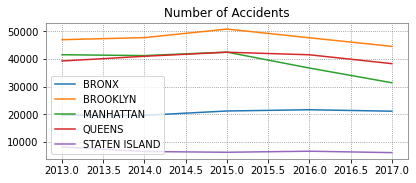

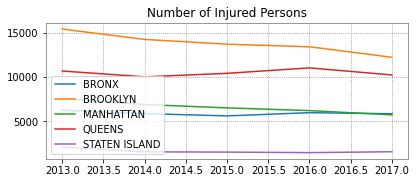

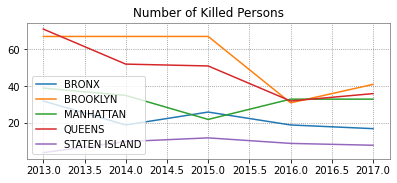

In [27]:
ax = data_per_years['unique_key'].plot(title = 'Number of Accidents', figsize = (6.5,2.5))
ax.legend(loc = 'lower left')
ax.set_xlabel('')
ax = data_per_years['sum_injured'].plot(title = 'Number of Injured Persons', figsize = (6.5,2.5))
ax.legend(loc = 'lower left')
ax.set_xlabel('')
ax = data_per_years['sum_killed'].plot(title = 'Number of Killed Persons', figsize = (6.5,2.5))
ax.legend(loc = 'lower left')
ax.set_xlabel('')

Population

In [28]:
b = ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']
y2013 = [1396142,2523102,1600150,2238435,471202]
y2014 = [1399820,2529236,1604909,2241006,472026]
y2015 = [1403498,2535370,1609668,2243577,472850]
y2016 = [1407176,2541504,1614427,2246148,473674]
y2017 = [1410854,2547638,1619186,2248719,474498]
a = [109.3, 179.7, 58.8, 281.5, 148.9]

In [29]:
population = pd.DataFrame({'borough':b, '2013':y2013, '2014':y2014, '2015':y2015, '2016':y2016, '2017':y2017, 'area':a})
population

,borough,2013,2014,2015,2016,2017,area
0,BRONX,1396142,1399820,1403498,1407176,1410854,109.3
1,BROOKLYN,2523102,2529236,2535370,2541504,2547638,179.7
2,MANHATTAN,1600150,1604909,1609668,1614427,1619186,58.8
3,QUEENS,2238435,2241006,2243577,2246148,2248719,281.5
4,STATEN ISLAND,471202,472026,472850,473674,474498,148.9


In [30]:
population_per_years = pd.pivot_table(population, 
               #index = 'borough',
               values = ['2013',
                         '2014',
                         '2015',
                         '2016',
                         '2017'
                         ],
               columns = 'borough',
                aggfunc =  {'2013':np.sum, 
                            '2014':np.sum,
                            '2015':np.sum,
                         '2016':np.sum,
                         '2017':np.sum
                          })
population_per_years

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
2013,1396142,2523102,1600150,2238435,471202
2014,1399820,2529236,1604909,2241006,472026
2015,1403498,2535370,1609668,2243577,472850
2016,1407176,2541504,1614427,2246148,473674
2017,1410854,2547638,1619186,2248719,474498


Data normalised by Population

In [31]:
data_per_years_cases_norm = data_per_years['unique_key']/population_per_years.values*1000
data_per_years_injured_norm = data_per_years['sum_injured']/population_per_years.values*1000
data_per_years_killed_norm = data_per_years['sum_killed']/population_per_years.values*1000

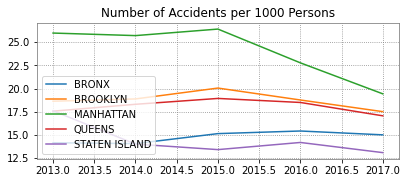

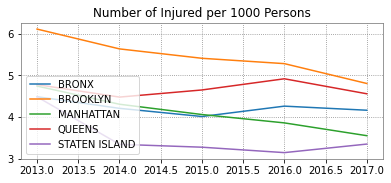

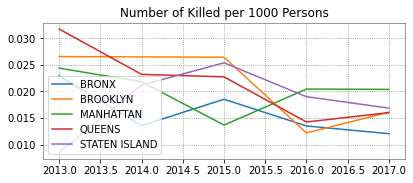

In [32]:
ax = data_per_years_cases_norm.plot(title = 'Number of Accidents per 1000 Persons', figsize = (6.5,2.5))
ax.legend(loc = 'lower left')
ax.set_xlabel('')
plt.show()
ax = data_per_years_injured_norm.plot(title = 'Number of Injured per 1000 Persons', figsize = (6.5,2.5))
ax.legend(loc = 'lower left')
ax.set_xlabel('')
plt.show()
ax = data_per_years_killed_norm.plot(title = 'Number of Killed per 1000 Persons', figsize = (6.5,2.5))
ax.legend(loc = 'lower left')
ax.set_xlabel('')
plt.show()

Ratio of injured/killed to number of accidents

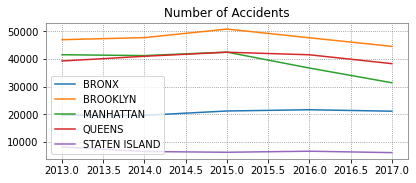

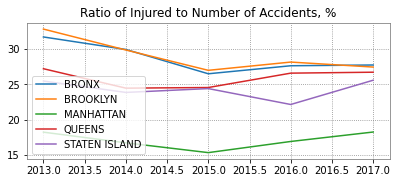

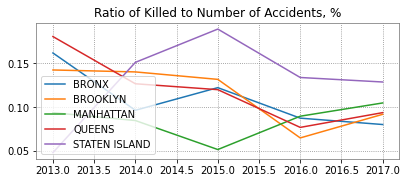

In [33]:
#data_per_years_brooklyn.plot(title = 'Brooklyn', figsize = (10,5))
ax = data_per_years['unique_key'].plot(title = 'Number of Accidents', figsize = (6.5,2.5))
#ax.set_ylim(35000, 55000)
ax.legend(loc = 'lower left')
ax.set_xlabel('')
plt.show()
ax = (data_per_years['sum_injured'] / data_per_years['unique_key'] * 100).plot(title = 'Ratio of Injured to Number of Accidents, %', figsize = (6.5,2.5))
ax.legend(loc = 'lower left')
ax.set_xlabel('')
plt.show()
ax = (data_per_years['sum_killed'] / data_per_years['unique_key'] * 100).plot(title = 'Ratio of Killed to Number of Accidents, %', figsize = (6.5,2.5),)
ax.legend(loc = 'lower left')
ax.set_xlabel('')
plt.show()

Brooklin accident analysis

In [34]:
frame_full_years_brooklyn = frame[(frame['borough'] == 'BROOKLYN') & (frame['year'] < 2018) & (frame['year'] > 2012)]
frame_full_years_brooklyn_injured = frame[(frame['borough'] == 'BROOKLYN') & (frame['year'] < 2018) & (frame['year'] > 2012)& (frame['sum_injured'] > 0)]
frame_full_years_brooklyn_killed = frame[(frame['borough'] == 'BROOKLYN') & (frame['year'] < 2018) & (frame['year'] > 2012) & (frame['sum_killed'] > 0)]

In [35]:
#frame_full_years_brooklyn.head()

In [36]:
data_per_years_brooklyn = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'year',
               values = ['unique_key',
                         'sum_injured', 'sum_killed',
                         ],
               #columns = 'borough',
                aggfunc =  {'unique_key':np.count_nonzero, 
                            'sum_injured':np.sum, 'sum_killed':np.sum
                            })

In [37]:
data_per_years_brooklyn

,sum_injured,sum_killed,unique_key
year,,,
2013,15410,67,47016
2014,14244,67,47758
2015,13707,67,50842
2016,13414,31,47697
2017,12232,41,44609


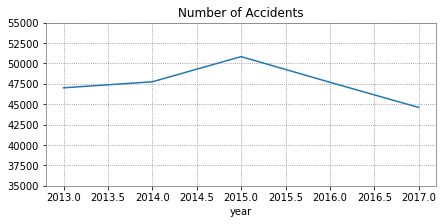

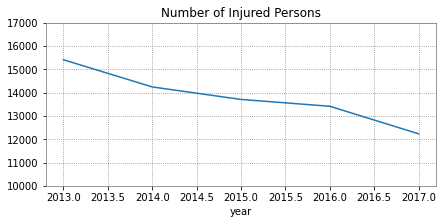

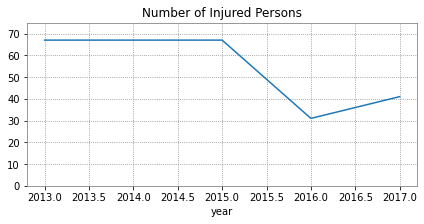

In [38]:
#data_per_years_brooklyn.plot(title = 'Brooklyn', figsize = (10,5))
ax = data_per_years_brooklyn['unique_key'].plot(title = 'Number of Accidents', figsize = (7,3))
ax.set_ylim(35000, 55000)
plt.show()
ax = data_per_years_brooklyn['sum_injured'].plot(title = 'Number of Injured Persons', figsize = (7,3))
ax.set_ylim(10000, 17000)
plt.show()
ax = data_per_years_brooklyn['sum_killed'].plot(title = 'Number of Injured Persons', figsize = (7,3))
ax.set_ylim(0, 75)
plt.show()

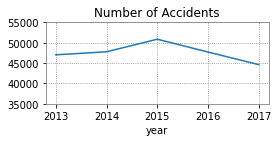

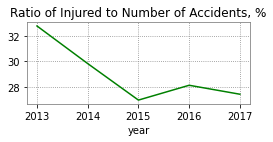

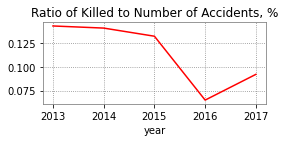

In [39]:
#data_per_years_brooklyn.plot(title = 'Brooklyn', figsize = (10,5))
ax = data_per_years_brooklyn['unique_key'].plot(title = 'Number of Accidents', figsize = (4,1.5))
ax.set_ylim(35000, 55000)
plt.show()
#ax = 
(data_per_years_brooklyn['sum_injured'] / data_per_years_brooklyn['unique_key'] * 100).plot(title = 'Ratio of Injured to Number of Accidents, %', figsize = (4,1.5), color = 'g')
#ax.set_ylim(10000, 17000)
plt.show()
#ax = 
(data_per_years_brooklyn['sum_killed'] / data_per_years_brooklyn['unique_key'] * 100).plot(title = 'Ratio of Killed to Number of Accidents, %', figsize = (4,1.5), color = 'r')
#ax.set_ylim(0, 75)
plt.show()

Data by factors

In [40]:
by_factors = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'group_factor_1',
               values = ['unique_key',
                         #'sum_injured', 'sum_killed',
                         ],
               columns = ['year'
               ],
                aggfunc =  {'unique_key':np.count_nonzero
                           # , 'sum_injured':np.sum, 'sum_killed':np.sum
                            }
               #, margins = True
               )

injured_by_factors_cases = pd.pivot_table(frame_full_years_brooklyn_injured, 
               index = 'group_factor_1',
               values = ['unique_key',
                         #'sum_injured', 'sum_killed',
                         ],
               columns = ['year'
               ],
                aggfunc =  {'unique_key':np.count_nonzero
                           # , 'sum_injured':np.sum, 'sum_killed':np.sum
                            }
               #, margins = True
               )

killed_by_factors_cases = pd.pivot_table(frame_full_years_brooklyn_killed, 
               index = 'group_factor_1',
               values = ['unique_key',
                         #'sum_injured', 'sum_killed',
                         ],
               columns = ['year'
               ],
                aggfunc =  {'unique_key':np.count_nonzero
                           # , 'sum_injured':np.sum, 'sum_killed':np.sum
                            }
                            ,fill_value = 0
                            
               #, margins = True
               )

In [41]:
by_factors
by_factors.sort_values(by = ('unique_key',2017), ascending = False)
by_factors_percent = by_factors / by_factors.sum(axis=0).values * 100

killed_by_factors_cases.sort_values(by = ('unique_key',2017), ascending = False)
killed_by_factors_cases_percent = killed_by_factors_cases / killed_by_factors_cases.sum(axis=0).values * 100

injured_by_factors_cases.sort_values(by = ('unique_key',2017), ascending = False)
injured_by_factors_cases_percent = injured_by_factors_cases / injured_by_factors_cases.sum(axis=0).values * 100

In [42]:
by_factors.sort_values(by = ('unique_key',2017), ascending = False)
#killed_by_factors.sort_values(by = ('unique_key',2017), ascending = False)
#injured_by_factors.sort_values(by = ('unique_key',2017), ascending = False)

unique_key                            
year                 2013   2014   2015   2016   2017
group_factor_1                                       
Driver               9877  12358  15540  14496  26956
Unknown             31419  28361  26400  28682  15027
Environment          1043   1369   1687   1005   1096
Vehicle               184    214    287    221    368
Pedestrian              5      6      6    115    357
Driver-Health        4174   5048   6370   2394    307
Passenger             272    300    363    158    141

In [43]:
#(by_factors[('unique_key',2017)]).plot.pie()
#((by_factors[('unique_key',2017)]).sort_values(ascending = False)).plot.pie(title = 'Impact of factors')

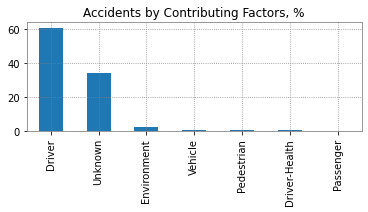

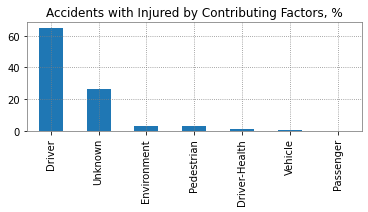

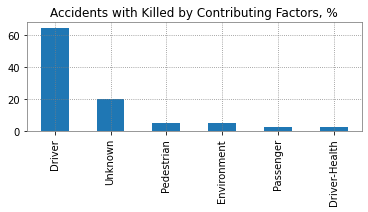

In [44]:
#(by_factors[('unique_key',2017)]).plot.bar()
#((by_factors[('unique_key',2017)]).sort_values(ascending = False)).plot.bar()

ax = ((by_factors_percent[('unique_key',2017)]).sort_values(ascending = False)).plot.bar(title = 'Accidents by Contributing Factors, %', figsize = (6,2))
ax.set_xlabel('')
#plt.tight_layout()
plt.show()
ax = ((injured_by_factors_cases_percent[('unique_key',2017)]).sort_values(ascending = False)).plot.bar(title = 'Accidents with Injured by Contributing Factors, %', figsize = (6,2))
ax.set_xlabel('')
plt.show()
ax = ((killed_by_factors_cases_percent[('unique_key',2017)]).sort_values(ascending = False)).plot.bar(title = 'Accidents with Killed by Contributing Factors, %', figsize = (6,2))
ax.set_xlabel('')
plt.show()

Killed Analysis

In [45]:
killed_by_factors_pers = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'group_factor_1',
               values = [#'unique_key',
                         'sum_injured', 'sum_killed',
                         ],
               columns = ['year'
               ],
                aggfunc =  {#'unique_key':np.count_nonzero
                           # , 
                            'sum_injured':np.sum, 'sum_killed':np.sum
                            }
                            ,fill_value = 0)

In [46]:
killed_by_factors_pers[('sum_killed',201617)] = killed_by_factors_pers[('sum_killed',2016)] + killed_by_factors_pers[('sum_killed',2017)]
killed_by_factors_pers[('sum_injured',201617)] = killed_by_factors_pers[('sum_injured',2016)] + killed_by_factors_pers[('sum_injured',2017)]

In [47]:
killed_by_factors_pers_percent = killed_by_factors_pers / killed_by_factors_pers.sum(axis=0).values * 100
killed_by_factors_pers_percent

sum_injured             ... sum_killed sum_injured
year                2013       2014    ...     201617      201617
group_factor_1                         ...                       
Driver           21.546854  27.511070  ...  50.704225   49.441219
Driver-Health     8.546009   9.777184  ...   2.816901    3.123643
Environment       2.272875   3.212202  ...   4.225352    2.870908
Passenger         1.461134   1.574471  ...   2.816901    0.493622
Pedestrian        0.006494   0.035144  ...   4.225352    1.492714
Unknown          65.744529  57.306530  ...  35.211268   41.811792
Vehicle           0.422105   0.583398  ...   0.000000    0.766102

[7 rows x 12 columns]

In [48]:
killed_by_factors_pers

sum_injured                ... sum_killed        sum_injured
year                2013   2014   2015    ...     2017   201617      201617
group_factor_1                            ...                              
Driver                3318   3914   4626  ...         26     36       12520
Driver-Health         1316   1391   1718  ...          1      2         791
Environment            350    457    434  ...          2      3         727
Passenger              225    224    272  ...          1      2         125
Pedestrian               1      5      1  ...          3      3         378
Unknown              10124   8153   6506  ...          8     25       10588
Vehicle                 65     83    118  ...          0      0         194

[7 rows x 12 columns]

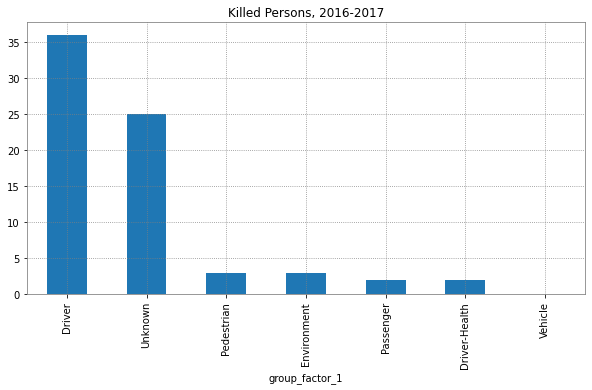

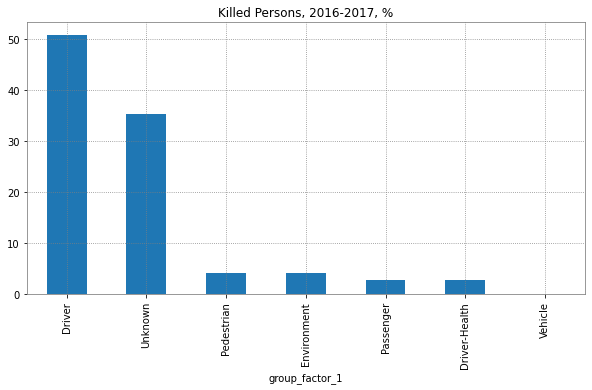

In [49]:
((killed_by_factors_pers[('sum_killed',201617)]).sort_values(ascending = False)).plot.bar(title = 'Killed Persons, 2016-2017', figsize = (10,5))
plt.show()
((killed_by_factors_pers_percent[('sum_killed',201617)]).sort_values(ascending = False)).plot.bar(title = 'Killed Persons, 2016-2017, %', figsize = (10,5))
plt.show()

In [50]:
frame_full_years_brooklyn_driver = frame[(frame['borough'] == 'BROOKLYN')
 & (frame['year'] < 2018) & (frame['year'] > 2012) 
 & (frame['group_factor_1'] == 'Driver')]

driver_by_factors = pd.pivot_table(frame_full_years_brooklyn_driver, 
               index = 'contributing_factor_vehicle_1',
               values = [#'unique_key',
                         'sum_injured', 'sum_killed',
                         ],
               columns = ['year'
               ],
                aggfunc =  {#'unique_key':np.count_nonzero
                           #, 
                            'sum_injured':np.sum, 'sum_killed':np.sum
                            }
               #, margins = True
               )

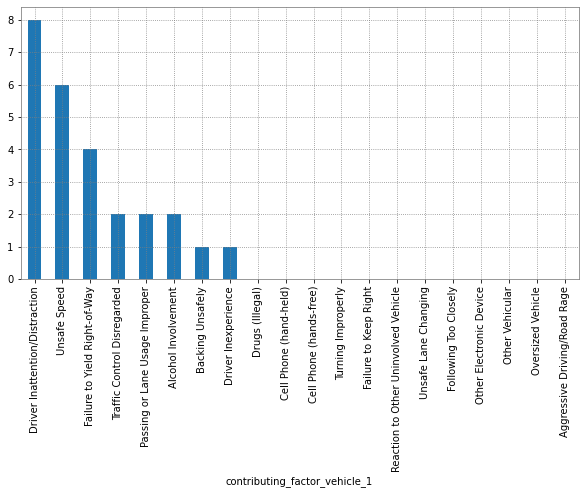

In [51]:
((driver_by_factors[('sum_killed',2017)]).sort_values(ascending = False)).plot.bar()

List of factors detailed

In [52]:
list_factors = [
'Driver',
'Environment',
'Vehicle',
'Pedestrian',
'Driver-Health',
'Passenger'
]

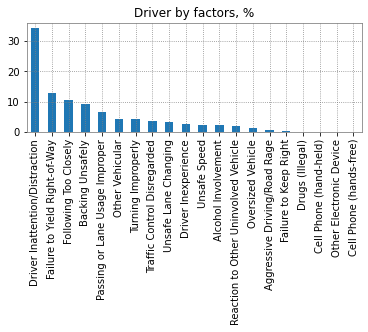

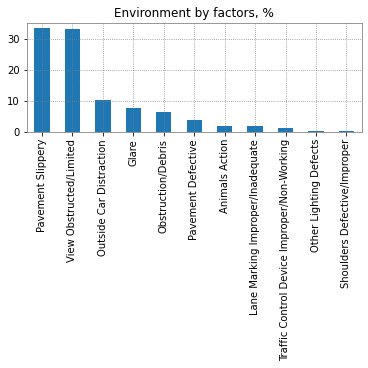

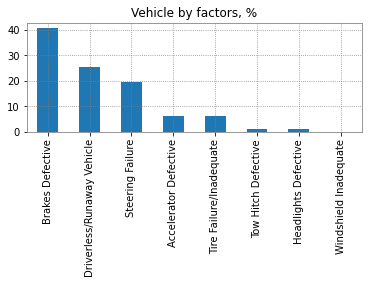

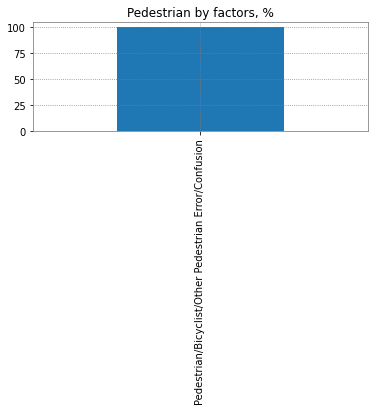

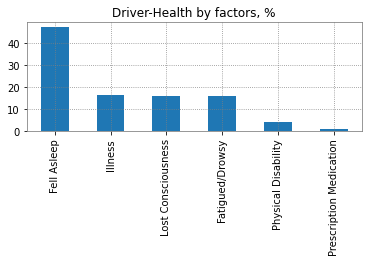

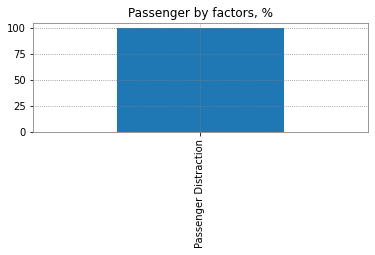

In [53]:
#cycle for each group of factors (9,3)
for elem in list_factors:
  frame_full_years_brooklyn_elem = frame[(frame['borough'] == 'BROOKLYN')
 & (frame['year'] < 2018) & (frame['year'] > 2012) 
 & (frame['group_factor_1'] == elem)]
  elem_by_factors = pd.pivot_table(frame_full_years_brooklyn_elem, 
               index = 'contributing_factor_vehicle_1',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
  elem_by_factors_percent = elem_by_factors / elem_by_factors.sum(axis=0).values * 100
  #((elem_by_factors[('unique_key',2017)]).sort_values(ascending = False)).plot.pie(title = elem)
  ax = ((elem_by_factors_percent[('unique_key',2017)]).sort_values(ascending = False)).plot.bar(title = elem+' by factors, %', figsize = (6,2))
  ax.set_xlabel('')
  plt.show()

Driver

In [54]:
frame_full_years_brooklyn_driver = frame[(frame['borough'] == 'BROOKLYN')
 & (frame['year'] < 2018) & (frame['year'] > 2012) 
 & (frame['group_factor_1'] == 'Driver')]
driver_by_factors = pd.pivot_table(frame_full_years_brooklyn_driver, 
               index = 'contributing_factor_vehicle_1',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
driver_by_factors_percent = driver_by_factors / driver_by_factors.sum(axis=0).values * 100

In [55]:
driver_by_factors_percent.sort_values(by = ('unique_key',2017), ascending=False)

unique_key  ...           
year                                       2013  ...       2017
contributing_factor_vehicle_1                    ...           
Driver Inattention/Distraction        35.567480  ...  34.330019
Failure to Yield Right-of-Way         20.745166  ...  12.972993
Following Too Closely                  0.253113  ...  10.379878
Backing Unsafely                      11.187608  ...   9.062917
Passing or Lane Usage Improper         0.141743  ...   6.688678
Other Vehicular                        6.510074  ...   4.225404
Turning Improperly                     5.700111  ...   4.140080
Traffic Control Disregarded            4.809153  ...   3.550230
Unsafe Lane Changing                   0.151868  ...   3.323935
Driver Inexperience                    5.123013  ...   2.622793
Unsafe Speed                           0.283487  ...   2.244398
Alcohol Involvement                    3.199352  ...   2.121977
Reaction to Other Uninvolved Vehicle   0.617596  ...   1.929070
Oversized Vehicle                      2.753873  ...   1.298412
Aggressive Driving/Road Rage           1.032702  ...   0.649206
Failure to Keep Right                  0.627721  ...   0.278231
Drugs (Illegal)                        0.141743  ...   0.070485
Cell Phone (hand-held)                 0.060747  ...   0.066775
Other Electronic Device                1.022578  ...   0.040807
Cell Phone (hands-free)                0.070872  ...   0.003710

[20 rows x 5 columns]

Analysis by type of vehicle

In [56]:
vehtype1 = frame['vehicle_type_code1'].unique()
vehtype2 = frame['vehicle_type_code2'].unique()
vehtype3 = frame['vehicle_type_code_3'].unique()
vehtype4 = frame['vehicle_type_code_4'].unique()
vehtype5 = frame['vehicle_type_code_5'].unique()
vehtypes = (list(set(list(vehtype1) + list(vehtype2) + list(vehtype3) + list(vehtype4) + list(vehtype5))))
#factors.pop(0)
len(vehtypes)

303

In [57]:
vehtypes

[nan,
 'forkl',
 'PICK-UP TRUCK',
 'utlit',
 'MINI',
 'BUS',
 'TRACK',
 'TRAC',
 'PL',
 'SP',
 'carri',
 'FORTL',
 'Ford',
 'trk',
 'POSTA',
 'PEDIC',
 'GN',
 'FORK',
 'P/SH',
 'DUMP',
 'OP',
 'firet',
 'PM',
 'Humme',
 'TK',
 'CM',
 'DEPT',
 'UHAUL',
 'amb',
 'LIMO',
 'REFG',
 'FIRET',
 'Road',
 'light',
 'van t',
 'REFRI',
 'FR',
 'TOW T',
 'TR/KI',
 'G OMR',
 'Unkno',
 'pick',
 'trl',
 'fork',
 'subn',
 'ambul',
 'LIVERY VEHICLE',
 'MAN L',
 'RENTA',
 'garba',
 'GG',
 'Motor',
 'SEMI-',
 'UNKNO',
 '013',
 'CAT',
 'van',
 'unkno',
 'Ambul',
 'INTER',
 'bsd',
 '18 Wh',
 'SCHOO',
 'schoo',
 'MOTORCYCLE',
 'PAS',
 'paylo',
 'MH',
 'EB',
 'DELV.',
 'SUBUR',
 'VAN/T',
 'bus',
 'LARGE COM VEH(6 OR MORE TIRES)',
 'Ice C',
 'RV',
 'APPOR',
 'horse',
 'SCOOTER',
 'Comme',
 'EN',
 'utili',
 'SPORT UTILITY / STATION WAGON',
 'E-BIK',
 'GARBA',
 'Tow t',
 'ladde',
 'TRL',
 'GE/SC',
 'Mo pa',
 'red,',
 'MACK',
 '3D',
 'SELF',
 'FORKL',
 'AMBULANCE',
 'BU',
 'elect',
 'mta b',
 'TRAIL',
 'AR',
 'O

In [58]:

data_by_vehtype = frame['vehicle_type_code1']
data_by_vehtype1 = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'vehicle_type_code1',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
data_by_vehtype2 = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'vehicle_type_code2',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
data_by_vehtype3 = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'vehicle_type_code_3',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
data_by_vehtype4 = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'vehicle_type_code_4',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
data_by_vehtype5 = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'vehicle_type_code_5',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )


In [59]:
data_by_years = pd.pivot_table(frame_full_years_brooklyn, 
               #index = 'vehicle_type_code1',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
data_by_years

year,2013,2014,2015,2016,2017
unique_key,47016,47758,50842,47697,44609


In [60]:
data_by_vehtype1.sort_values(by = ('unique_key',2017), ascending = False).head(30)

unique_key                                    
year                                2013     2014     2015     2016     2017
vehicle_type_code1                                                          
PASSENGER VEHICLE                27090.0  26803.0  27099.0  35168.0  23942.0
SPORT UTILITY / STATION WAGON    11262.0  11496.0  13789.0   7716.0  15523.0
PICK-UP TRUCK                      591.0    561.0    644.0    573.0   1257.0
BICYCLE                             55.0     73.0     98.0    284.0    891.0
TAXI                               530.0    624.0    748.0    396.0    792.0
MOTORCYCLE                         242.0    263.0    295.0    302.0    264.0
TK                                   NaN      NaN      1.0      NaN    183.0
BU                                   NaN      NaN      NaN      NaN    174.0
VAN                               1587.0   1616.0   1709.0    508.0     90.0
DS                                   NaN      NaN      NaN      NaN     62.0
VN                                   NaN      NaN      NaN      NaN     41.0
DP                                   NaN      NaN      NaN      NaN     37.0
AM                                   NaN      NaN      NaN      NaN     31.0
CONV                                 NaN      NaN      NaN      NaN     26.0
PK                                   NaN      NaN      NaN      NaN     23.0
TR                                   NaN      NaN      NaN      NaN     22.0
LL                                   NaN      NaN      NaN      NaN     21.0
FB                                   NaN      NaN      NaN      NaN     20.0
GG                                   NaN      NaN      NaN      NaN     16.0
TT                                   NaN      NaN      NaN      NaN     13.0
TN                                   NaN      NaN      NaN      NaN     11.0
FIRE TRUCK                          54.0     52.0     67.0     19.0     11.0
CM                                   NaN      NaN      NaN      NaN     10.0
CB                                   NaN      NaN      NaN      NaN      7.0
BUS                                847.0    906.0    990.0    198.0      7.0
MD                                   NaN      NaN      NaN      NaN      7.0
RF                                   NaN      NaN      NaN      NaN      5.0
MS                                   NaN      NaN      NaN      NaN      5.0
van                                  NaN      NaN      NaN      NaN      5.0
AMBULANCE                          120.0    128.0    176.0    100.0      4.0

In [61]:
data_by_vehtype2.sort_values(by = ('unique_key',2017), ascending = False).head(30)


unique_key                                    
year                                2013     2014     2015     2016     2017
vehicle_type_code2                                                          
PASSENGER VEHICLE                20038.0  19805.0  19595.0  25653.0  16183.0
SPORT UTILITY / STATION WAGON     8410.0   8574.0  10141.0   5199.0  10481.0
PICK-UP TRUCK                      506.0    508.0    604.0    507.0    959.0
BICYCLE                           1787.0   1641.0   1721.0   1498.0    695.0
TAXI                               439.0    503.0    512.0    277.0    573.0
MOTORCYCLE                         245.0    238.0    259.0    254.0    176.0
TK                                   NaN      NaN      NaN      NaN    175.0
BU                                   NaN      NaN      NaN      NaN    153.0
VAN                               1350.0   1415.0   1389.0    470.0     59.0
DS                                   NaN      NaN      NaN      NaN     58.0
VN                                   NaN      NaN      NaN      NaN     52.0
DP                                   NaN      NaN      NaN      NaN     28.0
LL                                   NaN      NaN      NaN      NaN     24.0
AM                                   NaN      NaN      NaN      NaN     22.0
FB                                   NaN      NaN      NaN      NaN     20.0
TR                                   NaN      NaN      NaN      NaN     19.0
PK                                   NaN      NaN      NaN      NaN     16.0
GG                                   NaN      NaN      NaN      NaN     12.0
FIRE TRUCK                          33.0     36.0     51.0     18.0     12.0
CONV                                 NaN      NaN      NaN      NaN     10.0
CM                                   NaN      NaN      NaN      NaN      7.0
TT                                   NaN      NaN      NaN      NaN      7.0
BUS                                555.0    643.0    730.0    166.0      6.0
TN                                   NaN      NaN      NaN      NaN      5.0
van                                  NaN      NaN      NaN      NaN      5.0
RF                                   NaN      NaN      NaN      NaN      4.0
TRAIL                                NaN      NaN      NaN      NaN      3.0
MD                                   NaN      NaN      NaN      NaN      3.0
CB                                   NaN      NaN      NaN      NaN      3.0
SCOOTER                             30.0     10.0     23.0      5.0      2.0

In [62]:
data_by_vehtype3.sort_values(by = ('unique_key',2017), ascending = False)


unique_key                                
year                                 2013    2014    2015    2016    2017
vehicle_type_code_3                                                      
PASSENGER VEHICLE                  1842.0  1785.0  1786.0  2243.0  1309.0
SPORT UTILITY / STATION WAGON       920.0   837.0   949.0   492.0   852.0
PICK-UP TRUCK                        25.0    28.0    26.0    31.0    72.0
TAXI                                 24.0    19.0    28.0    19.0    30.0
MOTORCYCLE                            8.0     6.0    11.0    19.0    13.0
BICYCLE                              16.0    18.0     8.0    22.0    12.0
BU                                    NaN     NaN     NaN     NaN     9.0
TK                                    NaN     NaN     NaN     NaN     5.0
VAN                                  80.0    95.0    99.0    20.0     2.0
VN                                    NaN     NaN     NaN     NaN     2.0
GG                                    NaN     NaN     NaN     NaN     2.0
DS                                    NaN     NaN     NaN     NaN     2.0
DP                                    NaN     NaN     NaN     NaN     2.0
MD                                    NaN     NaN     NaN     NaN     1.0
FB                                    NaN     NaN     NaN     NaN     1.0
TOW                                   NaN     NaN     NaN     NaN     1.0
TRACT                                 NaN     NaN     NaN     NaN     1.0
UNKNOWN                             190.0   169.0   219.0    30.0     1.0
BUS                                  24.0    33.0    32.0     5.0     1.0
AM                                    NaN     NaN     NaN     NaN     1.0
AMBULANCE                             2.0     2.0     1.0     1.0     NaN
FIRE TRUCK                            NaN     NaN     2.0     NaN     NaN
LARGE COM VEH(6 OR MORE TIRES)       21.0    15.0    20.0     5.0     NaN
LIVERY VEHICLE                        6.0    13.0    11.0     1.0     NaN
OTHER                                73.0    80.0    83.0    41.0     NaN
SCOOTER                               1.0     NaN     NaN     1.0     NaN
SMALL COM VEH(4 TIRES)               29.0    23.0    22.0    15.0     NaN

In [63]:
data_by_vehtype4.sort_values(by = ('unique_key',2017), ascending = False)

unique_key                            
year                                 2013   2014   2015   2016   2017
vehicle_type_code_4                                                  
PASSENGER VEHICLE                   446.0  443.0  431.0  554.0  332.0
SPORT UTILITY / STATION WAGON       218.0  200.0  245.0  126.0  231.0
PICK-UP TRUCK                         6.0    8.0    9.0    2.0   13.0
TAXI                                  5.0    5.0    7.0    3.0    8.0
MOTORCYCLE                            2.0    2.0    2.0    6.0    4.0
BICYCLE                               2.0    2.0    3.0    8.0    2.0
BU                                    NaN    NaN    NaN    NaN    2.0
FDNY                                  NaN    NaN    NaN    NaN    1.0
BUS                                   4.0    4.0    1.0    1.0    NaN
FIRE TRUCK                            NaN    NaN    1.0    NaN    NaN
LARGE COM VEH(6 OR MORE TIRES)        1.0    5.0    1.0    NaN    NaN
LIVERY VEHICLE                        1.0    NaN    NaN    NaN    NaN
OTHER                                19.0   18.0   25.0    4.0    NaN
SCOOTER                               1.0    NaN    NaN    NaN    NaN
SMALL COM VEH(4 TIRES)                5.0    4.0    4.0    2.0    NaN
UNKNOWN                              32.0   24.0   51.0    9.0    NaN
VAN                                  22.0   23.0   18.0    4.0    NaN

In [64]:
data_by_vehtype5.sort_values(by = ('unique_key',2017), ascending = False)

unique_key                            
year                                 2013   2014   2015   2016   2017
vehicle_type_code_5                                                  
PASSENGER VEHICLE                   130.0  116.0  119.0  145.0  103.0
SPORT UTILITY / STATION WAGON        61.0   69.0   81.0   45.0   76.0
PICK-UP TRUCK                         NaN    2.0    3.0    1.0    3.0
TK                                    NaN    NaN    NaN    NaN    2.0
AMBULANCE                             NaN    1.0    NaN    NaN    NaN
BICYCLE                               1.0    NaN    NaN    NaN    NaN
BUS                                   2.0    2.0    NaN    NaN    NaN
LARGE COM VEH(6 OR MORE TIRES)        NaN    2.0    NaN    NaN    NaN
MOTORCYCLE                            1.0    NaN    1.0    1.0    NaN
OTHER                                 4.0    6.0    7.0    2.0    NaN
SMALL COM VEH(4 TIRES)                NaN    NaN    NaN    1.0    NaN
TAXI                                  NaN    1.0    1.0    2.0    NaN
UNKNOWN                               4.0    4.0   11.0    2.0    NaN
VAN                                   3.0    4.0    5.0    2.0    NaN

In [65]:
#key_vehtypes = ['PASSENGER VEHICLE','SPORT UTILITY / STATION WAGON','PICK-UP TRUCK','BICYCLE','TAXI','MOTORCYCLE','BUS','VAN','AMBULANCE/FIRE TRUCK']
#tomap_vehtypes = [['PASSENGER VEHICLE'],['SPORT UTILITY / STATION WAGON'],['PICK-UP TRUCK', 'TK'],['BICYCLE'],['TAXI'],['MOTORCYCLE'],['BU', 'BUS'],['VAN', 'VN', 'van'],['AMBULANCE', 'AM', 'FIRE TRUCK']]

In [66]:
vehtype = ['PASSENGER VEHICLE','SPORT UTILITY / STATION WAGON','PICK-UP TRUCK', 'TK','BICYCLE','TAXI','MOTORCYCLE','VAN','VN','van','AMBULANCE','AM','FIRE TRUCK','BU','BUS','-','unk','Unkno','UNKNO','UNKNOWN','unkno']
vehtype_group = ['PASSENGER VEHICLE','SPORT UTILITY / STATION WAGON','PICK-UP TRUCK','PICK-UP TRUCK','BICYCLE','TAXI','MOTORCYCLE','VAN','VAN','VAN','AMBULANCE/FIRE TRUCK','AMBULANCE/FIRE TRUCK','AMBULANCE/FIRE TRUCK','BUS','BUS','','UNKNOWN','UNKNOWN','UNKNOWN','UNKNOWN','UNKNOWN']

In [67]:
map_vehtypes =  pd.DataFrame({'vehtype':vehtype, 'vehtype_group':vehtype_group}).set_index('vehtype')
map_vehtypes

,vehtype_group
vehtype,
PASSENGER VEHICLE,PASSENGER VEHICLE
SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON
PICK-UP TRUCK,PICK-UP TRUCK
TK,PICK-UP TRUCK
BICYCLE,BICYCLE
TAXI,TAXI
MOTORCYCLE,MOTORCYCLE
VAN,VAN
VN,VAN


In [68]:
map_vehtype_dict = map_vehtypes['vehtype_group'].to_dict()
frame['vehtype_group_1'] = (frame['vehicle_type_code1'].fillna('-')).apply(lambda x: map_vehtype_dict.get(x, 'OTHER'))
frame['vehtype_group_2'] = (frame['vehicle_type_code2'].fillna('-')).apply(lambda x: map_vehtype_dict.get(x, 'OTHER'))
frame['vehtype_group_3'] = (frame['vehicle_type_code_3'].fillna('-')).apply(lambda x: map_vehtype_dict.get(x, 'OTHER'))
frame['vehtype_group_4'] = (frame['vehicle_type_code_4'].fillna('-')).apply(lambda x: map_vehtype_dict.get(x, 'OTHER'))
frame['vehtype_group_5'] = (frame['vehicle_type_code_5'].fillna('-')).apply(lambda x: map_vehtype_dict.get(x, 'OTHER'))

In [69]:
#frame[['unique_key','vehicle_type_code1','vehtype_group_1','vehicle_type_code2','vehtype_group_2','vehicle_type_code_3','vehtype_group_3','vehicle_type_code_4','vehtype_group_4','vehicle_type_code_5','vehtype_group_5']].head(30)

In [70]:
#vehtypes = map_vehtypes['vehtype_group'].unique()
vehtypes = ['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'PICK-UP TRUCK', 'BICYCLE', 'TAXI', 'MOTORCYCLE', 'VAN', 'AMBULANCE/FIRE TRUCK', 'BUS', 'UNKNOWN','OTHER']
len(vehtypes)

11

In [71]:
for vehtype in vehtypes:
  frame[vehtype] = 0
  for idx in range(1,6):
    frame[vehtype] = frame[vehtype] + (frame[f"vehtype_group_{idx}"] == vehtype).astype("int")

frame['num_of_vehicles'] = 0
for vehtype in vehtypes:
  frame['num_of_vehicles'] = frame['num_of_vehicles'] + frame[vehtype]

#frame[['num_of_vehicles','SPORT UTILITY / STATION WAGON','AMBULANCE/FIRE TRUCK','unique_key','vehicle_type_code1','vehtype_group_1','vehicle_type_code2','vehtype_group_2','vehicle_type_code_3','vehtype_group_3','vehicle_type_code_4','vehtype_group_4','vehicle_type_code_5','vehtype_group_5']].head(30)

In [72]:
frame[['unique_key','num_of_vehicles'] + vehtypes].head()

,unique_key,num_of_vehicles,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PICK-UP TRUCK,BICYCLE,TAXI,MOTORCYCLE,VAN,AMBULANCE/FIRE TRUCK,BUS,UNKNOWN,OTHER
0,3830694,2,0,1,0,0,0,0,0,1,0,0,0
1,3216563,2,1,0,0,0,0,1,0,0,0,0,0
2,3795174,2,1,0,0,0,0,0,0,0,0,0,1
3,3803160,2,1,0,0,0,0,0,0,0,1,0,0
4,3794016,2,1,0,1,0,0,0,0,0,0,0,0


In [73]:
frame_full_years = frame[(frame['year'] < 2018) & (frame['year'] > 2012)]
frame_full_years_brooklyn = frame[(frame['borough'] == 'BROOKLYN') & (frame['year'] < 2018) & (frame['year'] > 2012)]
frame_full_years_brooklyn_injured = frame[(frame['borough'] == 'BROOKLYN') & (frame['year'] < 2018) & (frame['year'] > 2012)& (frame['sum_injured'] > 0)]
frame_full_years_brooklyn_killed = frame[(frame['borough'] == 'BROOKLYN') & (frame['year'] < 2018) & (frame['year'] > 2012) & (frame['sum_killed'] > 0)]

In [74]:
cases_by_numveh = pd.pivot_table(frame_full_years, 
               index = 'year',
               values = ['unique_key'],
               columns = ['borough', 'num_of_vehicles'],
              aggfunc =  {'unique_key':np.count_nonzero}
               )

In [75]:
cases_by_numveh

unique_key                          ...                                  
borough              BRONX                          ... STATEN ISLAND                    
num_of_vehicles          0       1        2      3  ...             2      3      4     5
year                                                ...                                  
2013                   2.0  2473.0  16079.0  931.0  ...        6741.0  490.0  102.0  17.0
2014                  84.0  2446.0  16014.0  900.0  ...        5410.0  371.0   73.0  17.0
2015                   5.0  2657.0  17336.0  975.0  ...        5044.0  384.0   54.0  17.0
2016                 388.0  4767.0  15344.0  894.0  ...        5018.0  338.0   65.0  14.0
2017                 624.0  7030.0  12566.0  705.0  ...        4045.0  273.0   56.0  11.0

[5 rows x 30 columns]

In [76]:
#cases_by_numveh
frame['num_of_vehicles'].unique()
cases_by_numveh_brooklyn = cases_by_numveh[('unique_key','BROOKLYN')].T[2017]

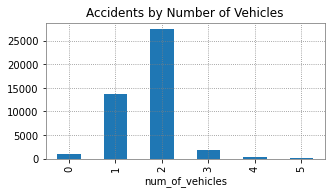

In [77]:
cases_by_numveh_brooklyn.plot.bar(title = 'Accidents by Number of Vehicles', figsize = (5,2.5))
plt.show()

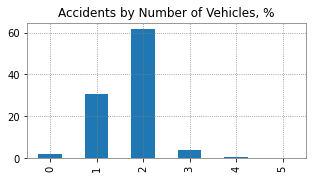

In [78]:
ax = (cases_by_numveh_brooklyn/cases_by_numveh_brooklyn.sum()*100).plot.bar(title = 'Accidents by Number of Vehicles, %', figsize = (5,2.5))
ax.set_xlabel('')
plt.show()

In [79]:
part_by_typeveh = pd.pivot_table(frame_full_years_brooklyn, 
               #index = 'year',
               values = vehtypes,
               columns = ['year'],
              aggfunc = np.sum
                  #'unique_key':np.count_nonzero
                  
               )
part_by_typeveh

year,2013,2014,2015,2016,2017
AMBULANCE/FIRE TRUCK,274,274,390,197,83
BICYCLE,1861,1734,1830,1812,1600
BUS,1432,1588,1753,370,352
MOTORCYCLE,498,509,568,582,457
OTHER,6544,7243,7412,3581,633
PASSENGER VEHICLE,49546,48952,49030,63763,41869
PICK-UP TRUCK,1128,1107,1287,1114,2669
SPORT UTILITY / STATION WAGON,20871,21176,25205,13578,27163
TAXI,998,1152,1296,697,1403
UNKNOWN,7184,7424,8391,1842,8


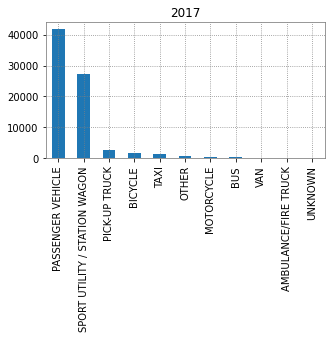

In [80]:
(part_by_typeveh[(2017)].sort_values(ascending = False)).plot.bar(title = '2017', figsize = (5,2.5))
plt.show()

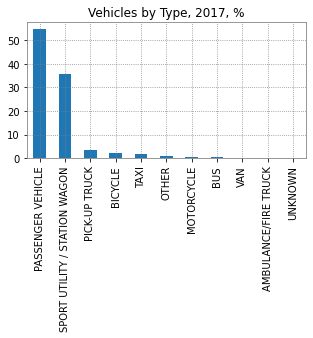

In [81]:
part_by_typeveh_percent = part_by_typeveh / part_by_typeveh.sum(axis=0).values * 100
part_by_typeveh_percent
(part_by_typeveh_percent[(2017)].sort_values(ascending = False)).plot.bar(title = 'Vehicles by Type, 2017, %', figsize = (5,2.5))
plt.show()

In [82]:
part_by_typeveh_percent.sort_values(by = 2017, ascending=False)

year,2013,2014,2015,2016,2017
PASSENGER VEHICLE,53.059607,51.904318,48.843418,72.016038,54.735727
SPORT UTILITY / STATION WAGON,22.351089,22.453134,25.109083,15.335442,35.510439
PICK-UP TRUCK,1.207993,1.173764,1.282102,1.258188,3.489208
BICYCLE,1.992975,1.838578,1.823036,2.046533,2.091695
TAXI,1.068774,1.221478,1.291068,0.787215,1.834155
OTHER,7.008075,7.679829,7.383794,4.044500,0.827527
MOTORCYCLE,0.533316,0.539698,0.565838,0.657330,0.597440
BUS,1.533552,1.683773,1.746329,0.417890,0.460173
VAN,3.257727,3.343159,3.207746,1.133951,0.334671
AMBULANCE/FIRE TRUCK,0.293431,0.290525,0.388516,0.222498,0.108507


Street

In [83]:
data_by_cross_street = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'cross_street_name',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
data_by_cross_street.sort_values(by = ('unique_key',2017), ascending=False).head(20)

unique_key                            
year                    2013   2014   2015   2016   2017
cross_street_name                                       
ATLANTIC AVENUE        563.0  558.0  587.0  426.0  330.0
4 AVENUE               590.0  550.0  645.0  380.0  316.0
CHURCH AVENUE          373.0  331.0  320.0  346.0  267.0
NOSTRAND AVENUE        489.0  534.0  544.0  309.0  262.0
LINDEN BOULEVARD       396.0  394.0  398.0  316.0  257.0
3 AVENUE               533.0  491.0  530.0  339.0  254.0
BEDFORD AVENUE         517.0  504.0  496.0  350.0  253.0
AVENUE J               353.0  358.0  311.0  271.0  248.0
5 AVENUE               422.0  449.0  451.0  276.0  218.0
EASTERN PARKWAY        284.0  341.0  347.0  252.0  214.0
UTICA AVENUE           316.0  323.0  365.0  225.0  205.0
OCEAN PARKWAY          246.0  249.0  259.0  198.0  203.0
KINGS HIGHWAY          324.0  292.0  319.0  280.0  197.0
FLATBUSH AVENUE        311.0  307.0  281.0  248.0  193.0
FULTON STREET          411.0  427.0  456.0  245.0  183.0
AVENUE I               208.0  214.0  200.0  221.0  180.0
AVENUE N               189.0  194.0  229.0  154.0  180.0
FOSTER AVENUE          239.0  236.0  225.0  199.0  178.0
8 AVENUE               252.0  283.0  314.0  195.0  167.0
RALPH AVENUE           232.0  223.0  247.0  175.0  166.0

In [84]:
data_by_on_street = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'on_street_name',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
data_by_on_street.sort_values(by = ('unique_key',2017), ascending=False).head(20)

unique_key                               
year                      2013    2014    2015    2016   2017
on_street_name                                               
ATLANTIC AVENUE         1579.0  1632.0  1627.0  1148.0  911.0
FLATBUSH AVENUE         1147.0  1048.0  1043.0   814.0  703.0
LINDEN BOULEVARD         756.0   653.0   664.0   627.0  492.0
EASTERN PARKWAY          626.0   664.0   625.0   473.0  427.0
OCEAN PARKWAY            657.0   652.0   603.0   530.0  421.0
KINGS HIGHWAY            504.0   488.0   515.0   474.0  375.0
NOSTRAND AVENUE          665.0   713.0   810.0   529.0  372.0
BEDFORD AVENUE           679.0   722.0   712.0   455.0  364.0
UTICA AVENUE             665.0   564.0   572.0   521.0  357.0
CHURCH AVENUE            344.0   345.0   378.0   397.0  349.0
CONEY ISLAND AVENUE      521.0   565.0   516.0   459.0  344.0
3 AVENUE                 484.0   475.0   491.0   363.0  304.0
OCEAN AVENUE             455.0   443.0   502.0   387.0  294.0
PENNSYLVANIA AVENUE      546.0   562.0   579.0   361.0  280.0
FULTON STREET            471.0   546.0   591.0   364.0  280.0
4 AVENUE                 566.0   544.0   477.0   349.0  275.0
RALPH AVENUE             360.0   335.0   345.0   283.0  267.0
AVENUE J                 246.0   219.0   236.0   218.0  230.0
86 STREET                351.0   358.0   422.0   268.0  227.0
65 STREET                344.0   346.0   332.0   280.0  224.0

In [85]:
data_by_off_street = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'off_street_name',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
data_by_off_street.sort_values(by = ('unique_key',2017), ascending=False).head(20)

unique_key                      
year                                 2013 2014 2015  2016  2017
off_street_name                                                
450       FLATBUSH AVENUE             NaN  NaN  NaN  19.0  37.0
501       GATEWAY DRIVE               NaN  NaN  NaN  25.0  36.0
625       ATLANTIC AVENUE             NaN  NaN  NaN  16.0  35.0
976       3 AVENUE                    NaN  NaN  NaN   6.0  24.0
63        FLUSHING AVENUE             NaN  NaN  NaN   7.0  23.0
10        GRAND ARMY PLAZA            NaN  NaN  NaN   8.0  23.0
139       FLATBUSH AVENUE             NaN  NaN  NaN  10.0  20.0
1752      SHORE PARKWAY               NaN  NaN  NaN   3.0  19.0
2601      OCEAN PARKWAY               NaN  NaN  NaN  14.0  18.0
1470      EAST NEW YORK AVENUE        NaN  NaN  NaN   5.0  16.0
339       GATEWAY DRIVE               NaN  NaN  NaN   1.0  15.0
1080      MC DONALD AVENUE            NaN  NaN  NaN   8.0  14.0
230       NOSTRAND AVENUE             NaN  NaN  NaN   7.0  13.0
519       GATEWAY DRIVE               NaN  NaN  NaN  11.0  12.0
620       ATLANTIC AVENUE             NaN  NaN  NaN   5.0  12.0
590       GATEWAY DRIVE               NaN  NaN  NaN   2.0  12.0
8973      BAY PARKWAY                 NaN  NaN  NaN  13.0  12.0
506       6 STREET                    NaN  NaN  NaN   4.0  11.0
2001      ORIENTAL BOULEVARD          NaN  NaN  NaN   2.0  11.0
360       GATEWAY DRIVE               NaN  NaN  NaN   1.0  10.0

In [86]:
#(data_by_cross_street.fillna(0) + data_by_on_street.fillna(0) + data_by_off_street.fillna(0)).sort_values(by = ('unique_key',2017), ascending=False).head(20)
#sum_by_street = (data_by_cross_street(2017).fillna(0) + data_by_on_street(2017).fillna(0) + data_by_off_street(2017).fillna(0))
#(sum_by_street.fillna(0)).sort_values(by = ('unique_key',2017), ascending=False).head(20)

In [87]:
(data_by_cross_street.fillna(0).add(data_by_on_street.fillna(0),fill_value = 0).add(data_by_off_street.fillna(0),fill_value = 0)).sort_values(by = ('unique_key',2017), ascending=False).head(40)

unique_key                                
year                            2013    2014    2015    2016    2017
ATLANTIC AVENUE               2142.0  2190.0  2214.0  1574.0  1241.0
FLATBUSH AVENUE               1458.0  1355.0  1324.0  1062.0   896.0
LINDEN BOULEVARD              1152.0  1047.0  1062.0   943.0   749.0
EASTERN PARKWAY                910.0  1005.0   972.0   725.0   641.0
NOSTRAND AVENUE               1154.0  1247.0  1354.0   838.0   634.0
OCEAN PARKWAY                  903.0   901.0   862.0   728.0   624.0
BEDFORD AVENUE                1196.0  1226.0  1208.0   805.0   617.0
CHURCH AVENUE                  717.0   676.0   698.0   743.0   616.0
4 AVENUE                      1156.0  1094.0  1122.0   729.0   591.0
KINGS HIGHWAY                  828.0   780.0   834.0   754.0   572.0
UTICA AVENUE                   981.0   887.0   937.0   746.0   562.0
3 AVENUE                      1017.0   966.0  1021.0   702.0   558.0
CONEY ISLAND AVENUE            709.0   767.0   714.0   630.0   490.0
AVENUE J                       599.0   577.0   547.0   489.0   478.0
FULTON STREET                  882.0   973.0  1047.0   609.0   463.0
RALPH AVENUE                   592.0   558.0   592.0   458.0   433.0
OCEAN AVENUE                   645.0   606.0   709.0   541.0   426.0
PENNSYLVANIA AVENUE            794.0   791.0   805.0   548.0   405.0
5 AVENUE                       713.0   788.0   806.0   501.0   371.0
FLATLANDS AVENUE               551.0   564.0   639.0   468.0   368.0
FOSTER AVENUE                  439.0   431.0   457.0   420.0   340.0
FORT HAMILTON PARKWAY          263.0   301.0   287.0   370.0   335.0
86 STREET                      532.0   531.0   599.0   369.0   330.0
GLENWOOD ROAD                  382.0   394.0   397.0   360.0   319.0
AVENUE U                       561.0   576.0   494.0   471.0   317.0
AVENUE I                       327.0   339.0   319.0   354.0   314.0
65 STREET                      447.0   468.0   445.0   362.0   305.0
AVENUE N                       345.0   364.0   400.0   298.0   303.0
ROCKAWAY PARKWAY               413.0   403.0   427.0   317.0   300.0
BEVERLEY ROAD                  148.0   193.0   188.0   278.0   293.0
8 AVENUE                       428.0   472.0   514.0   334.0   292.0
ROCKAWAY AVENUE                391.0   367.0   377.0   298.0   289.0
FARRAGUT ROAD                  359.0   309.0   333.0   301.0   279.0
MYRTLE AVENUE                  645.0   570.0   715.0   346.0   279.0
AVENUE M                       303.0   326.0   389.0   269.0   277.0
AVENUE L                       328.0   355.0   346.0   296.0   272.0
AVENUE P                       363.0   371.0   420.0   403.0   269.0
ROGERS AVENUE                  446.0   499.0   512.0   327.0   268.0
FLATBUSH AVENUE EXTENSION      385.0   393.0   370.0   362.0   254.0
TILLARY STREET                 391.0   367.0   362.0   305.0   251.0

In [88]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196940 entries, 0 to 1196939
Data columns (total 58 columns):
 #   Column                         Non-Null Count    Dtype              
---  ------                         --------------    -----              
 0   borough                        857348 non-null   object             
 1   contributing_factor_vehicle_1  1191285 non-null  object             
 2   contributing_factor_vehicle_2  1033601 non-null  object             
 3   contributing_factor_vehicle_3  77659 non-null    object             
 4   contributing_factor_vehicle_4  16708 non-null    object             
 5   contributing_factor_vehicle_5  4126 non-null     object             
 6   cross_street_name              870809 non-null   object             
 7   timestamp                      1196940 non-null  object             
 8   latitude                       982739 non-null   float64            
 9   longitude                      982739 non-null   float64            

Analysis of victims

In [89]:
injured_by_type = pd.pivot_table(frame_full_years_brooklyn, 
               #index = 'borough',
               values = [
                         'number_of_cyclist_injured',
                         'number_of_motorist_injured',
                         'number_of_pedestrians_injured'
                         ],
               columns = 'year',
                aggfunc =  {
                             'number_of_cyclist_injured':np.sum, 
                             'number_of_motorist_injured':np.sum,
                             'number_of_pedestrians_injured':np.sum, 
                            })
injured_by_type

year,2013,2014,2015,2016,2017
number_of_cyclist_injured,1539,1409,1513,1447,1317
number_of_motorist_injured,10230,9487,9166,9028,8143
number_of_pedestrians_injured,3641,3348,3028,2939,2772


In [90]:
killed_by_type = pd.pivot_table(frame_full_years_brooklyn, 
               #index = 'borough',
               values = [
                          'number_of_cyclist_killed',
                          'number_of_motorist_killed', 
                         'number_of_pedestrians_killed'
                         ],
               columns = 'year',
                 aggfunc =  {
                            'number_of_cyclist_killed':np.sum,
                             'number_of_motorist_killed':np.sum, 
                            'number_of_pedestrians_killed':np.sum
                            })
killed_by_type

year,2013,2014,2015,2016,2017
number_of_cyclist_killed,4,4,4,7,8
number_of_motorist_killed,33,21,17,5,13
number_of_pedestrians_killed,30,42,46,19,20


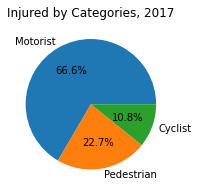

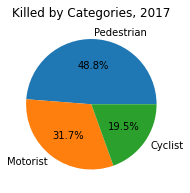

In [91]:
ax = (injured_by_type[(2017)].sort_values(ascending = False)).plot.pie(title = 'Injured by Categories, 2017', figsize = (5,3), labels = ['Motorist','Pedestrian','Cyclist'],autopct='%1.1f%%')
#ax.legend(['Cyclist', 'Motorist','Pedestrian'])
# labels = ['Motorist','Pedestrian','Cyclist']
ax.set_ylabel('')
plt.show()
ax = (killed_by_type[(2017)].sort_values(ascending = False)).plot.pie(title = 'Killed by Categories, 2017', figsize = (5,3),labels = ['Pedestrian','Motorist','Cyclist'], autopct='%1.1f%%')
ax.set_ylabel('')
plt.show()

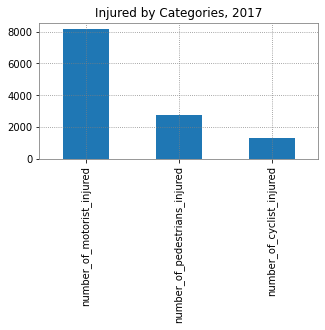

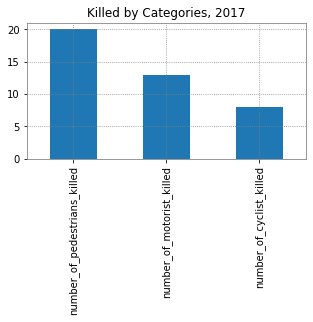

In [92]:
(injured_by_type[(2017)].sort_values(ascending = False)).plot.bar(title = 'Injured by Categories, 2017', figsize = (5,2.5),)
plt.show()
(killed_by_type[(2017)].sort_values(ascending = False)).plot.bar(title = 'Killed by Categories, 2017', figsize = (5,2.5))
plt.show()

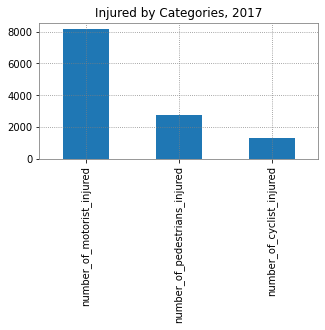

In [93]:
(injured_by_type[(2017)].sort_values(ascending = False)).plot.bar(title = 'Injured by Categories, 2017', figsize = (5,2.5),)
plt.show()

In [94]:

#killed_by_type_percent

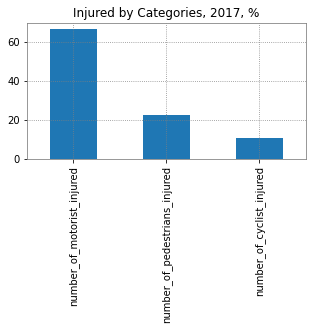

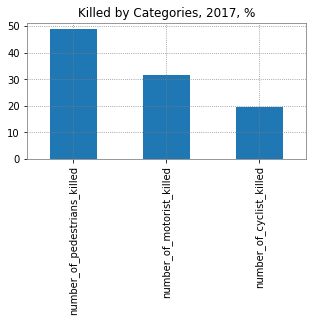

In [95]:
injured_by_type_percent = injured_by_type / injured_by_type.sum(axis=0).values * 100
killed_by_type_percent = killed_by_type / killed_by_type.sum(axis=0).values * 100

(injured_by_type_percent[(2017)].sort_values(ascending = False)).plot.bar(title = 'Injured by Categories, 2017, %', figsize = (5,2.5))
plt.show()
(killed_by_type_percent[(2017)].sort_values(ascending = False)).plot.bar(title = 'Killed by Categories, 2017, %', figsize = (5,2.5))
plt.show()

Geodata

In [96]:
%pip install -U plotly

In [97]:
import plotly.figure_factory as ff
import plotly.express as px
px.set_mapbox_access_token(open("map_token.txt").read())

In [98]:
frame_map_brooklyn = frame[(frame['latitude'] > 38) & (frame['latitude'] < 42) & (frame['longitude'] > -75) & (frame['longitude'] > -75) & (frame['borough'] == 'BROOKLYN')]

In [99]:
frame_map_brooklyn_injured = frame_map_brooklyn[frame_map_brooklyn['sum_injured'] > 0]
frame_map_brooklyn_killed = frame_map_brooklyn[frame_map_brooklyn['sum_killed'] > 0]

In [100]:
parameter = 25
fig = ff.create_hexbin_mapbox(frame_map_brooklyn[frame_map_brooklyn['year'] == 2017], lat='latitude', lon='longitude',
                              nx_hexagon=parameter, opacity=0.3, labels={'color': 'Point Count'},
    min_count=1)
fig.show()
fig = ff.create_hexbin_mapbox(frame_map_brooklyn_injured[frame_map_brooklyn_injured['year'] == 2017], lat='latitude', lon='longitude',
                              nx_hexagon=parameter, opacity=0.3, labels={'color': 'Point Count'},
    min_count=1)
fig.show()
fig = ff.create_hexbin_mapbox(frame_map_brooklyn_killed[frame_map_brooklyn_killed['year'] == 2017], lat='latitude', lon='longitude',
                              nx_hexagon=parameter, opacity=0.3, labels={'color': 'Point Count'},
    min_count=1)
fig.show()

In [101]:

frame_map_brooklyn_driver = frame_map_brooklyn[(frame_map_brooklyn['group_factor_1'] == 'Driver') & (frame_map_brooklyn['year'] == 2017)]
frame_map_brooklyn_environment = frame_map_brooklyn[(frame_map_brooklyn['group_factor_1'] == 'Environment') & (frame_map_brooklyn['year'] == 2017)]


In [102]:
parameter2 = 25
fig = ff.create_hexbin_mapbox(frame_map_brooklyn_driver, lat='latitude', lon='longitude',
                              nx_hexagon=parameter2, opacity=0.3, labels={'color': 'Point Count'},
    min_count=1)
fig.show()
fig = ff.create_hexbin_mapbox(frame_map_brooklyn_environment, lat='latitude', lon='longitude',
                              nx_hexagon=parameter2, opacity=0.3, labels={'color': 'Point Count'},
    min_count=1)
fig.show()

In [103]:
frame_map_brooklyn_pavement = frame_map_brooklyn[((frame_map_brooklyn['contributing_factor_vehicle_1'] == 'Pavement Defective') | (frame_map_brooklyn['contributing_factor_vehicle_1'] == 'Pavement Slippery')) & (frame_map_brooklyn['year'] == 2017)]
frame_map_brooklyn_view = frame_map_brooklyn[((frame_map_brooklyn['contributing_factor_vehicle_1'] == 'View Obstructed/Limited')) & (frame_map_brooklyn['year'] == 2017)]


In [104]:
#frame_map_brooklyn_pavement

In [105]:
parameter2 = 25
fig = ff.create_hexbin_mapbox(frame_map_brooklyn_pavement, lat='latitude', lon='longitude',
                              nx_hexagon=parameter2, opacity=0.3, 
                              labels={'color': 'Point Count'},
                              min_count=1)
fig.show()
fig = ff.create_hexbin_mapbox(frame_map_brooklyn_view, lat='latitude', lon='longitude',
                              nx_hexagon=parameter2, opacity=0.3, labels={'color': 'Point Count'},
    min_count=1)
fig.show()

Analysis by time

In [106]:
frame['hour'] = frame['date_date'].dt.hour
#frame['time'] = frame['date_date'].dt.time
#frame[['date_date','hour']].head()

In [107]:
frame_full_years_brooklyn = frame[(frame['borough'] == 'BROOKLYN')
 & (frame['year'] < 2018) & (frame['year'] > 2012)]
cases_by_time = pd.pivot_table(frame_full_years_brooklyn, 
               index = 'hour',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )

In [108]:
cases_by_time.head()

unique_key                       
year       2013 2014  2015  2016  2017
hour                                  
0           913  948  1076  1494  1479
1           693  635   792   674   626
2           527  539   593   501   457
3           407  451   426   456   408
4           499  481   548   529   440

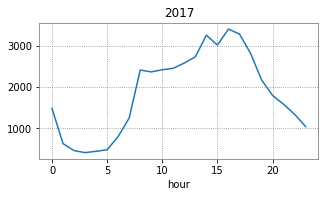

In [109]:
cases_by_time[('unique_key', 2017)]

#(cases_by_time[('unique_key',2017)]).rolling(60).mean().plot.line(title = '2017')
#plt.show()

(cases_by_time[('unique_key',2017)]).plot.line(title = '2017', figsize = (5,2.5))
plt.show()

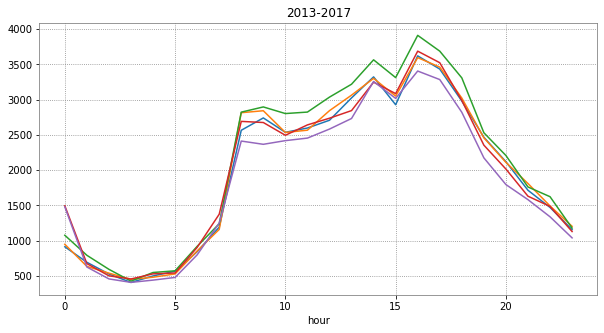

In [110]:
(cases_by_time[('unique_key',2013)]).plot.line(title = '2013')
(cases_by_time[('unique_key',2014)]).plot.line(title = '2014')
(cases_by_time[('unique_key',2015)]).plot.line(title = '2015')
(cases_by_time[('unique_key',2016)]).plot.line(title = '2016')
(cases_by_time[('unique_key',2017)]).plot.line(title = '2013-2017')

Time by business day/WeekEnd

In [111]:
frame['is_busd'] = np.is_busday(frame['date'])
#frame[frame['is_busd'] == False].head()

In [112]:
frame_full_years_brooklyn_bday = frame[(frame['borough'] == 'BROOKLYN')
 & (frame['year'] < 2018) & (frame['year'] > 2012) &
 (frame['is_busd'] == True)]
cases_by_time_bday = pd.pivot_table(frame_full_years_brooklyn_bday, 
               index = 'hour',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )
frame_full_years_brooklyn_weekend = frame[(frame['borough'] == 'BROOKLYN')
 & (frame['year'] < 2018) & (frame['year'] > 2012) &
 (frame['is_busd'] == False)]
cases_by_time_weekend = pd.pivot_table(frame_full_years_brooklyn_weekend, 
               index = 'hour',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )

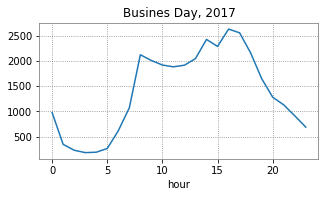

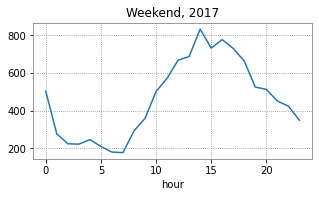

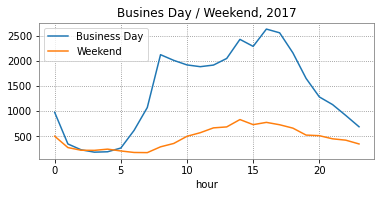

In [113]:
(cases_by_time_bday[('unique_key',2017)]).plot.line(title = 'Busines Day, 2017',figsize = (5,2.5))
plt.show()
(cases_by_time_weekend[('unique_key',2017)]).plot.line(title = 'Weekend, 2017',figsize = (5,2.5))
plt.show()

ax = (cases_by_time_bday[('unique_key',2017)]).plot.line(title = 'Busines Day, 2017',figsize = (6,2.5), label = 'Business Day')
ax.legend(loc = 'lower left')
#plt.show()
ax = (cases_by_time_weekend[('unique_key',2017)]).plot.line(title = 'Busines Day / Weekend, 2017',figsize = (6,2.5), label = 'Weekend')
ax.legend(loc = 'upper left')
plt.show()

Participants

In [114]:
vec_cols = ['vehicle_type_code1',
'vehicle_type_code2',		
'vehicle_type_code_3',	
'vehicle_type_code_4',	
'vehicle_type_code_5']
frame['num_part'] = (~frame['vehicle_type_code1'].isna()).astype(int)
for col in vec_cols[1:]:
  frame['num_part'] = frame['num_part'] + (~frame[col].isna()).astype(int)
frame['num_part'].unique()

array([2, 3, 4, 5, 1, 0])

In [115]:
len(frame[frame['num_part'] == 0])

9123

In [116]:
frame_full_years_brooklyn_part = frame[(frame['borough'] == 'BROOKLYN')
 & (frame['year'] < 2018) & (frame['year'] > 2012)]

cases_by_time_part = pd.pivot_table(frame_full_years_brooklyn_part, 
               index = 'num_part',
               values = ['unique_key' ],
               columns = ['year'],
                aggfunc =  {'unique_key':np.count_nonzero}
               )

In [117]:
cases_by_time_part

unique_key                            
year           2013   2014   2015   2016   2017
num_part                                       
0                 4    117      8    590   1045
1              4877   5038   5609   9539  13731
2             38874  39480  41928  34623  27514
3              2497   2385   2499   2226   1726
4               558    531    570    518    409
5               206    207    228    201    184

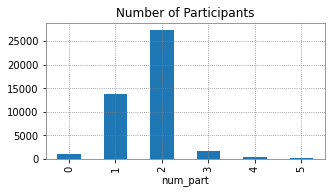

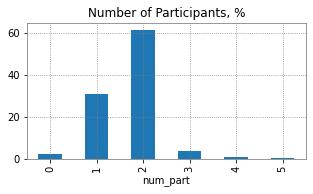

In [118]:
(cases_by_time_part[('unique_key',2017)]).plot.bar(title = 'Number of Participants',figsize = (5,2.5))
plt.show()

cases_by_time_part_percent = cases_by_time_part / cases_by_time_part.sum(axis=0).values * 100
(cases_by_time_part_percent[('unique_key',2017)]).plot.bar(title = 'Number of Participants, %',figsize = (5,2.5))
plt.show()

# **Data Check**

In [119]:
#there is no duplicates in cases
len(frame['unique_key']) == len(frame['unique_key'].unique())

True

In [120]:
pd.pivot_table(frame, index = 'borough', values = 'unique_key', aggfunc = {'unique_key':np.count_nonzero})

,unique_key
borough,
BRONX,114287
BROOKLYN,263715
MANHATTAN,215819
QUEENS,224092
STATEN ISLAND,39435


In [121]:
#total injured not equal to sum of columns
error_data_injured = frame[frame.number_of_persons_injured != frame.number_of_cyclist_injured + frame.number_of_motorist_injured + frame.number_of_pedestrians_injured]

In [122]:
#total killed not equal to sum of columns
error_data_killed = frame[frame.number_of_persons_killed != frame.number_of_cyclist_killed + frame.number_of_motorist_killed + frame.number_of_pedestrians_killed]

In [123]:
#error_data_injured.info

In [124]:
error_data_killed.info

<bound method DataFrame.info of               borough  ... num_part
3552        MANHATTAN  ...        2
20314   STATEN ISLAND  ...        1
87606             NaN  ...        1
449632       BROOKLYN  ...        2
892793       BROOKLYN  ...        2

[5 rows x 61 columns]>

In [125]:
#total injured not equal to sum of columns
frame['diff_injured'] = frame.number_of_persons_injured - (frame.number_of_cyclist_injured + frame.number_of_motorist_injured + frame.number_of_pedestrians_injured)
#total killed not equal to sum of columns
frame['diff_killed'] = frame.number_of_persons_killed - (frame.number_of_cyclist_killed + frame.number_of_motorist_killed + frame.number_of_pedestrians_killed)

In [126]:
pd.pivot_table(frame, index = 'borough', values = ['diff_injured', 'diff_killed', 'number_of_persons_injured', 'number_of_persons_killed', 'number_of_cyclist_injured', 'number_of_cyclist_killed','number_of_motorist_injured', 'number_of_motorist_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed'], aggfunc = np.sum)

,diff_injured,diff_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed
borough,,,,,,,,,,
BRONX,-124,0,1862,9,22783,44,8129,77,32650,130
BROOKLYN,-297,0,8137,29,51273,101,17745,177,76858,307
MANHATTAN,-216,-2,6141,20,17868,23,13093,140,36886,181
QUEENS,-360,0,4053,20,42367,98,11986,154,58046,272
STATEN ISLAND,-64,-1,223,2,7906,31,1489,22,9554,54


In [127]:
#pd.pivot_table(frame, index = 'borough', values = 'unique_key', aggfunc = np.count_nonzero)

In [128]:
#frame['timestamp']

In [129]:
pd.pivot_table(frame, 
               index = 'borough',
               values = ['unique_key',
                         'sum_injured', 'sum_killed',
                         #'number_of_persons_injured', 'number_of_persons_killed',
                         #'number_of_cyclist_injured', 'number_of_cyclist_killed',
                         # 'number_of_motorist_injured', 'number_of_motorist_killed', 
                         #'number_of_pedestrians_injured', 'number_of_pedestrians_killed'
                         ],
               columns = 'year',
                aggfunc =  {'unique_key':np.count_nonzero, 
                            'sum_injured':np.sum, 'sum_killed':np.sum
                             #,'number_of_persons_injured':np.sum, 'number_of_persons_killed':np.sum,
                             #'number_of_cyclist_injured':np.sum, 'number_of_cyclist_killed':np.sum,
                             #'number_of_motorist_injured':np.sum, 'number_of_motorist_killed':np.sum, 
                             #'number_of_pedestrians_injured':np.sum, 'number_of_pedestrians_killed':np.sum
                            })

sum_injured                       ... unique_key                    
year                 2012   2013   2014   2015  ...       2015   2016   2017  2018
borough                                         ...                               
BRONX                2878   6259   5886   5626  ...      21251  21703  21175  1195
BROOKLYN             7519  15410  14244  13707  ...      50842  47697  44609  2491
MANHATTAN            3867   7584   6906   6529  ...      42517  36765  31461  1517
QUEENS               5506  10687  10028  10423  ...      42482  41555  38363  2224
STATEN ISLAND        1245   2111   1577   1547  ...       6344   6720   6212   348

[5 rows x 21 columns]

In [130]:
frame2018 = frame[frame['year'] == 2018]

In [131]:
pd.pivot_table(frame2018, 
               index = 'borough',
               values = ['unique_key',
                         'sum_injured', 'sum_killed',
                         ],
               columns = ['year', 'month', 'day'],
                aggfunc =  {'unique_key':np.count_nonzero, 
                            'sum_injured':np.sum, 'sum_killed':np.sum

                            })

sum_injured                     ... unique_key                       
year                 2018                     ...       2018                       
month                   1                     ...          1                       
day                    1   2   3  4   5   6   ...         16   17   18   19  20  21
borough                                       ...                                  
BRONX                  10  11  16  8  13   9  ...         77   69   73   50  39  32
BROOKLYN               29  25  33  8  22  21  ...        117   91  125  109  95  92
MANHATTAN              10  12  11  5   9   8  ...         88   69   73   99  75  46
QUEENS                 14  36  22  7  19  14  ...        107  104   88  117  97  71
STATEN ISLAND           1   1   2  1   3   8  ...         11   24   19   14  15   5

[5 rows x 63 columns]

In [132]:
data_per_months = pd.pivot_table(frame, 
               index = ['year','month'],
               values = ['unique_key',
                         'sum_injured', 'sum_killed',
                         ],
               columns = 'borough',
                aggfunc =  {'unique_key':np.count_nonzero, 
                            'sum_injured':np.sum, 'sum_killed':np.sum
                            })

In [133]:
data_per_months

sum_injured                     ... unique_key                     
borough          BRONX BROOKLYN MANHATTAN  ...  MANHATTAN QUEENS STATEN ISLAND
year month                                 ...                                
2012 7             548     1344       702  ...       3654   3204           768
     8             466     1270       677  ...       3594   3150           849
     9             464     1289       674  ...       3507   3152           808
     10            462     1250       624  ...       3497   3174           831
     11            416     1056       587  ...       3064   3186           798
...                ...      ...       ...  ...        ...    ...           ...
2017 9             465      929       513  ...       2634   3010           476
     10            488      960       488  ...       2584   3253           513
     11            460     1036       439  ...       2678   3321           512
     12            421     1049       441  ...       2696   3448           579
2018 1             266      629       247  ...       1517   2224           348

[67 rows x 15 columns]

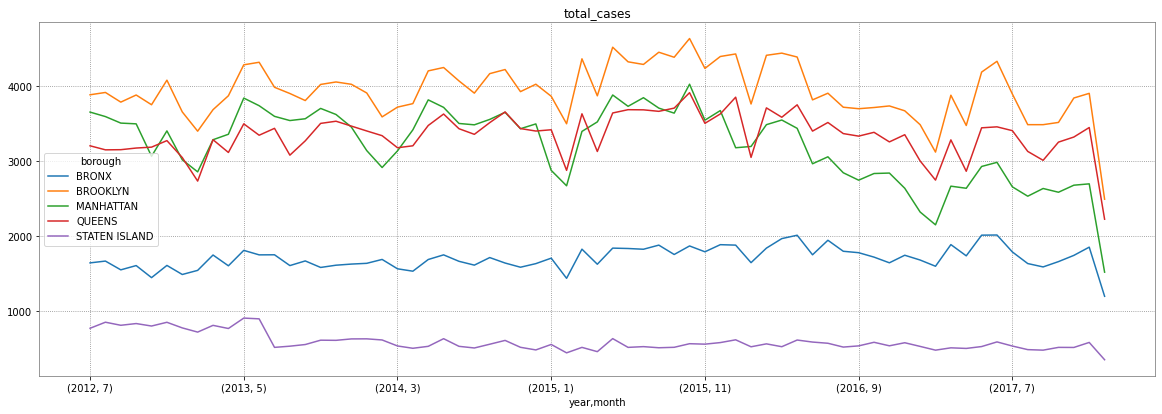

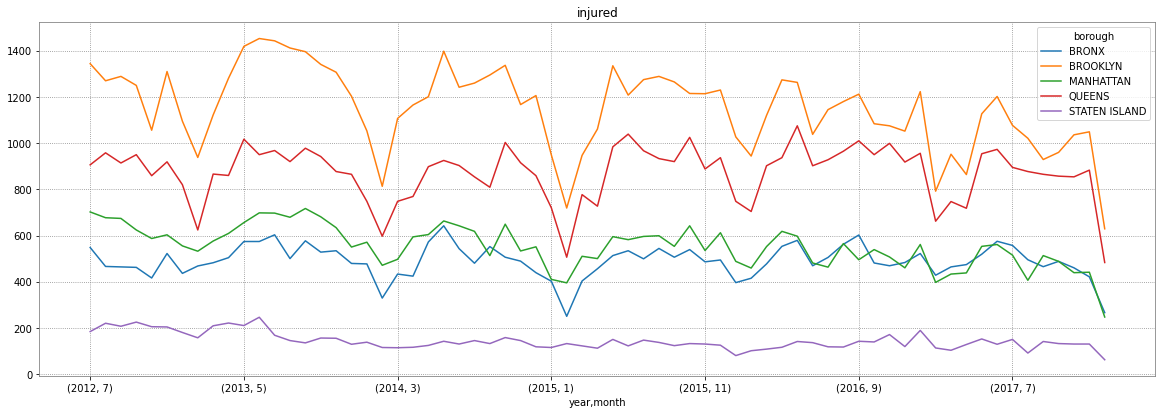

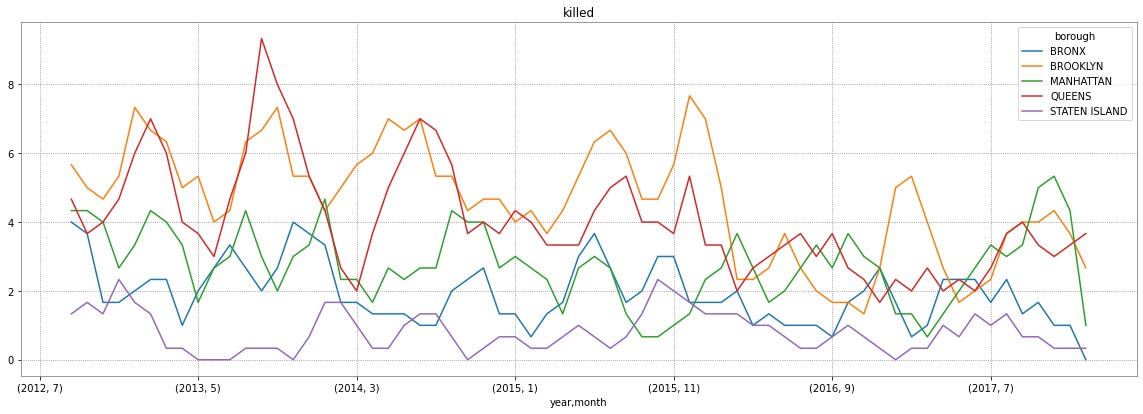

In [134]:
data_per_months['unique_key'].plot(title = 'total_cases', figsize = (20,6.5))
data_per_months['sum_injured'].plot(title = 'injured', figsize = (20,6.5))
data_per_months['sum_killed'].rolling(3).mean().plot(title = 'killed', figsize = (20,6.5))

In [135]:
data_per_factors = pd.pivot_table(frame_full_years, 
               index = 'year',
               values = ['unique_key',
                         'sum_injured', 'sum_killed',
                         ],
               columns = ['borough',
                          'contributing_factor_vehicle_1'
                          ],
                aggfunc =  {'unique_key':np.count_nonzero, 
                            'sum_injured':np.sum, 'sum_killed':np.sum
                            })

In [136]:
factors1 = frame['contributing_factor_vehicle_1'].unique()
factors2 = frame['contributing_factor_vehicle_2'].unique()
factors3 = frame['contributing_factor_vehicle_3'].unique()
factors4 = frame['contributing_factor_vehicle_4'].unique()
factors5 = frame['contributing_factor_vehicle_5'].unique()

In [137]:
factors = (list(set(list(factors1) + list(factors2) + list(factors3) + list(factors4) + list(factors5))))
factors.pop(0)
len(factors)

48

In [138]:
factors.sort()
factors

['Accelerator Defective',
 'Aggressive Driving/Road Rage',
 'Alcohol Involvement',
 'Animals Action',
 'Backing Unsafely',
 'Brakes Defective',
 'Cell Phone (hand-held)',
 'Cell Phone (hands-free)',
 'Driver Inattention/Distraction',
 'Driver Inexperience',
 'Driverless/Runaway Vehicle',
 'Drugs (Illegal)',
 'Failure to Keep Right',
 'Failure to Yield Right-of-Way',
 'Fatigued/Drowsy',
 'Fell Asleep',
 'Following Too Closely',
 'Glare',
 'Headlights Defective',
 'Illness',
 'Lane Marking Improper/Inadequate',
 'Lost Consciousness',
 'Obstruction/Debris',
 'Other Electronic Device',
 'Other Lighting Defects',
 'Other Vehicular',
 'Outside Car Distraction',
 'Oversized Vehicle',
 'Passenger Distraction',
 'Passing or Lane Usage Improper',
 'Pavement Defective',
 'Pavement Slippery',
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
 'Physical Disability',
 'Prescription Medication',
 'Reaction to Other Uninvolved Vehicle',
 'Shoulders Defective/Improper',
 'Steering Failure',
 'T